<h1 span style="text-align:center; color:MediumVioletRed;">Data augmentation to handle overfitting</span>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

In [4]:
data_dir

'.\\datasets\\flower_photos'

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [7]:
roses = list(data_dir.glob('./roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

## Data Visualization

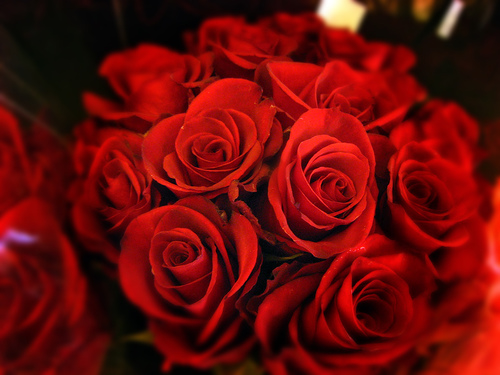

In [8]:
PIL.Image.open(roses[69])

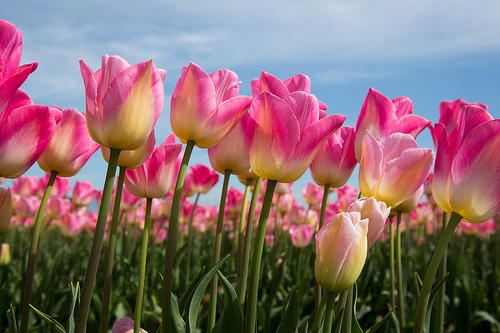

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(tulips[3])

## Path management

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [12]:
flowers_images_dict['roses']

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'),
 WindowsPath('datasets/flower_photos/

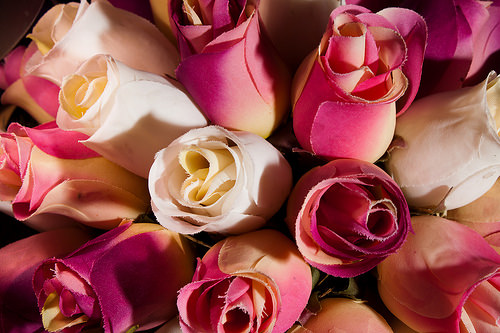

In [13]:
PIL.Image.open(flowers_images_dict['roses'][88])

In [14]:
img = cv2.imread(flowers_images_dict['roses'][88])
img.shape

(333, 500, 3)

In [15]:
cv2.resize(img, (180,180)).shape

(180, 180, 3)

##  Input output processing

In [16]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(image)
        resized_img = cv2.resize(img, (180, 180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [17]:
X = np.array(X)
y = np.array(y)

In [18]:
X[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [19]:
y[0]

np.int64(0)

## Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)

In [21]:
len(X_train)

2752

In [22]:
len(X_test)

918

## Scaling

In [23]:
X_train_scaled = X_train / 255
X_test_scaled =X_test /255

In [24]:
X_train_scaled

array([[[[0.99607843, 0.99607843, 0.99607843],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

## Model Training

In [25]:
num_classes = 5

model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ['accuracy'])

In [26]:
model.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - accuracy: 0.3858 - loss: 1.4021
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - accuracy: 0.5759 - loss: 1.0160
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - accuracy: 0.7115 - loss: 0.7611
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - accuracy: 0.7803 - loss: 0.5793
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - accuracy: 0.8984 - loss: 0.2959
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - accuracy: 0.9443 - loss: 0.1827
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - accuracy: 0.9652 - loss: 0.1248
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - accuracy: 0.9666 - loss: 0.1119
Epoch 9/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - accuracy: 0.9848 - loss: 0.0506
Epoch 10/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - accuracy: 0.9861 - loss: 0.0468
Epoch 11/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - accuracy: 0.9950 - loss: 0.0217
Epoch 12/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/ste

In [32]:
model.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6627 - loss: 2.4186


[2.4782650470733643, 0.655773401260376]

#### *Here we can see that the training accuracy is high(99.86%) but the test accuracy is low(65.58%) due to overfitting* 

In [33]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


array([[-5.7559299e+00,  2.2902002e+00,  1.1727679e+01,  6.2461128e+00,
        -2.6350591e+00],
       [ 1.5404065e+01, -6.2423406e+00, -6.3806109e+00, -3.2390740e+00,
         1.5426608e+01],
       [ 1.4335388e+01, -3.0392585e+00, -1.3929055e+01, -3.0172966e+00,
         1.6045038e+01],
       ...,
       [ 9.6106324e-03,  4.5338511e-01, -2.7124777e+00, -5.2906380e+00,
         1.6560501e+01],
       [ 1.9762323e+01,  3.5533195e+00, -9.4062595e+00, -2.9658940e+00,
         7.5282011e+00],
       [ 6.7512989e+00, -8.0340519e+00,  9.4020071e+00, -1.4117010e+01,
        -8.8160658e-01]], dtype=float32)

In [34]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([2.5417132e-08, 7.9344369e-05, 9.9577481e-01, 4.1452153e-03,
       5.7610680e-07], dtype=float32)>

In [35]:
np.argmax(score)

np.int64(2)

In [36]:
y_test[0]

np.int64(2)

## Data Augmentation

In [145]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.3),
    layers.RandomZoom(0.1),
])

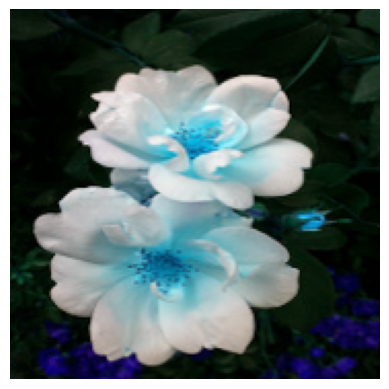

In [146]:
plt.axis('off')
plt.imshow(X[0])

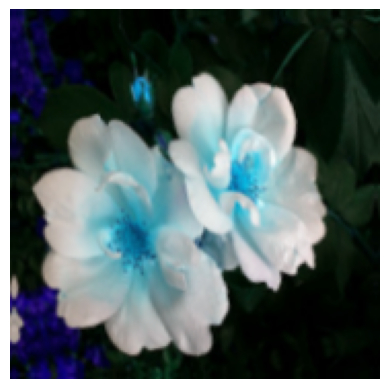

In [147]:
plt.axis("off")
plt.imshow(data_augmentation(X[0]).numpy().astype("uint8"))

## Model Training using Data Augmentation

In [143]:
num_classes = 5

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.3),
    layers.RandomZoom(0.1),
])

model = Sequential([
    #data augmetation layer
    data_augmentation,
    #convolution layers
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    #flatten layer
    layers.Flatten(),
    #dense layers
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.3026 - loss: 1.5482
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.5362 - loss: 1.1046
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - accuracy: 0.5978 - loss: 1.0216
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.6091 - loss: 0.9576
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - accuracy: 0.6294 - loss: 0.9201
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.6836 - loss: 0.8090
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.6648 - loss: 0.8369
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.7166 - loss: 0.7474
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - accuracy: 0.7131 - loss: 0.7386
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.7163 - loss: 0.7148
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 135ms/step - accuracy: 0.7386 - loss: 0.6953
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11

In [144]:
model.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7513 - loss: 0.7127


[0.7415536046028137, 0.7538126111030579]

### Here using data augmentation we improved accuracy from 65% to 75%